In [2]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
from pandas_datareader import data as pdr 
import yfinance as yf



In [3]:
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    covmatrix = returns.cov()
    return mean_returns, covmatrix

stocks = ['AAPL', 'MSFT', 'GOOGL']  # example stocks
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

mean_returns, covmatrix = get_data(stocks, start_date, end_date)
print(mean_returns)
print(covmatrix)

[*********************100%%**********************]  3 of 3 completed

Ticker
AAPL     0.000604
GOOGL    0.001512
MSFT     0.001590
dtype: float64
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    0.000195  0.000084  0.000075
GOOGL   0.000084  0.000308  0.000103
MSFT    0.000075  0.000103  0.000151


In [4]:
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

print(weights)

[0.33589164 0.32592623 0.33818213]


Text(0.5, 1.0, 'MC simulation of a stock portfolio')

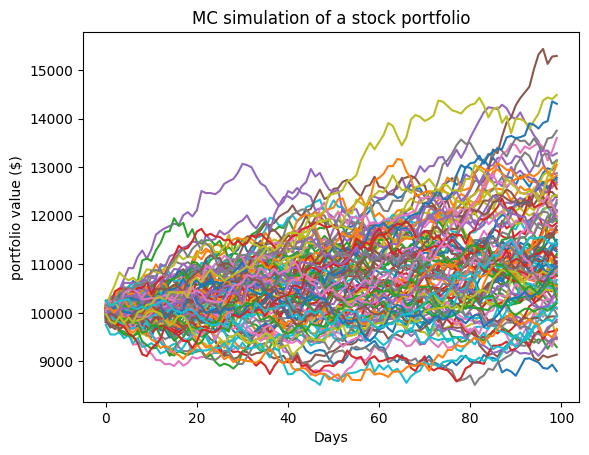

In [5]:
# Monte Carlo Simulation 
mc_sims = 100 
T = 100 

meanM = np.full(shape=(T,len(weights)),fill_value=mean_returns)
meanM = meanM.T
initialPortfolio = 10000

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
for m in range(mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covmatrix)
    daily_returns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('portfolio value ($)')
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")



In [6]:
def mcVar(returns, alpha=5):
    
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

In [7]:
def mccVar(returns, alpha=5):
    if isinstance(returns, pd.Series):
        belowVar = returns <= mcVar(returns, alpha=alpha)
        return returns[belowVar].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [8]:
portfolio_results = pd.Series(portfolio_sims[-1,:])
VaR = initialPortfolio - mcVar(portfolio_results, alpha=5)
CVaR = initialPortfolio - mccVar(portfolio_results, alpha=5)
print('VaR: ${}'.format(round(VaR,2)))
print('CVaR: ${}'.format(round(CVaR,2)))

VaR: $505.29
CVaR: $769.1


In [16]:
# initial derivative parameters

S = 101.15
K = 98.01
vol = 0.0991
r = 0.01
N = 10
M = 10000
marketValue = 3.86
T = ((dt.date(2022,3,17)-dt.date.today()).days+1)/365
print(T)



-2.271232876712329


In [17]:
dte = T/N
nudt = (r - 0.5*vol**2)*dte
volsdt = vol*np.sqrt(dte)
lns = np.log(S)

sum_ct = 0
sum_ct2 = 0

for i in range(M):
    lnst = lns 
    for j in range(N):
        lnst = lnst + nudt + volsdt*np.random.normal()
    
    ST = np.exp(lnst)
    CT = max(0, ST - K)
    sum_ct = sum_ct + CT
    cum_ct2 = sum_ct2 + CT*CT

C0 = np.exp(-r*T)*sum_ct/M
sigma = np.sqrt( (sum_ct2 - sum_ct*sum_ct/M)* np.exp(-2*r*T) / (M-1))
SE = sigma/np.sqrt(M)

print('Call value is ${0} with SE +/- {1}'.format(np.round(C0,2),np.round(SE,2)))


Call value is $0.0 with SE +/- 0.0


/var/folders/cr/2v0p62js4yg161nws06lqptw0000gn/T/ipykernel_53813/3374206278.py:3: RuntimeWarning: invalid value encountered in sqrt
  volsdt = vol*np.sqrt(dte)


In [24]:
dt = T/N
nudt = (r-0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lns = np.log(S)

Z = np.random.normal(size=(N,M))
delta_lnst = nudt + volsdt*Z
lnst = lns + np.cumsum(delta_lnst, axis=0)
lnst = np.concatenate((np.full(shape=(1,M), fill_value=lns), lnst))

ST = np.exp(lnst)
CT = np.maximum(0, ST - K)
C0 = np.exp(-r * T)*np.sum(CT[-1])/M

sigma = np.sqrt( np.sum( (CT[-1] - C0)**2) / (M-1))
SE = sigma/np.sqrt(M)



/var/folders/cr/2v0p62js4yg161nws06lqptw0000gn/T/ipykernel_53813/2937269595.py:3: RuntimeWarning: invalid value encountered in sqrt
  volsdt = vol*np.sqrt(dt)
